#  Project2: Wrangling and Analyzing Data
## Table of Contents
<ul>
<li><a href="#Gather">Step 1: Gathering data</a></li>
<li><a href="#Access">Step 2: Assessing data</a></li>
<li><a href="#Cleaning">Step 3: Cleaning data</a></li>
<li><a href="#Store">Step 4: Storing data</a></li>
<li><a href="#Analyze">Step 5: Analyzing and Visualizing data</a></li>
<li><a href="#Report">Step 6:  Reporting</a></li>
<li><a href="#References">Step 7:  References</a></li>    
</ul>

<a id='Gather'></a>
## Step1: Gathering Data


There are three set of data to gather for this project. Each of them to be gathered using different methods. 

In [1]:
# Import the libraries
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import os
import numpy as np
import re
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


<br>
1. Loading WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [101]:
# Loading the first dataset directly
df_1= pd.read_csv('twitter_archive_enhanced.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'twitter_archive_enhanced.csv'

<br>
2. Using the Request library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Loading the second dataset using the request library
# df_2 for second DataFrame

df_2 = 'WeRateDogs_reviews'
if not os.path.exists(df_2):  # to check a folder exists or not
    os.makedirs(df_2)         # to create a directory/folder
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

In [4]:
# Response [200] shows there is no error
response

<Response [200]>

In [5]:
with open(os.path.join(df_2, url.split('/')[-1]), mode = 'wb') as file:  #  extracting (image-predictions.tsv)
    file.write(response.content)

In [6]:
os.listdir(df_2)

['image-predictions.tsv']

In [7]:
# assigning df2 to the second dataset
df2 = pd.read_csv('image-predictions.tsv', sep='\t')

<br>
3. Loading the json file (tweet-json.txt) into a DataFrame

In [8]:
# converting the text file to a data list and DataFrame
df3_list = []  # creat an empty list for the dataframe

with open ('tweet-json.txt', encoding = 'utf-8') as file:
    for line in file:
        parse_json_to_dic = json.loads(line)  # parse jason string to python dictionary
        df3_list.append(parse_json_to_dic)
      

In [9]:
len(df3_list)

2354

In [10]:
# passing the tweet_id,favorites_count and retweet_count into Dataframe

# creating the three list that will serve as column header
idlist = []
retweetlist = []
favoritelist = []

for info in df3_list:    
    i_d = info['id']
    retweets = info['retweet_count']
    favorites = info ['favorite_count']
    
    
    idlist.append(i_d)
    retweetlist.append(retweets)
    favoritelist.append(favorites)
# create twwet_df dataframe
    df_3 = pd.DataFrame({'tweet_id': idlist, 'retweet_count': retweetlist, 'favorite_count':favoritelist})


In [11]:
df_3.sample(10)

,tweet_id,retweet_count,favorite_count
1327,705898680587526145,643,2597
645,793150605191548928,1984,6909
979,749417653287129088,1904,6721
2262,667538891197542400,72,220
1984,672884426393653248,897,1661
187,855862651834028034,27,320
1684,681610798867845120,533,2100
325,833826103416520705,3904,16728
459,817777686764523521,3084,11901
1145,726935089318363137,2738,7496


In [12]:
# To check the rows in favorite_count that contains value 0
sum(df_3.favorite_count==0)

179

<a id='Access'></a>
## Step 2:Assessing Data
#### The requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.


##### Quality Issues

#### Visual Assessment of df_1
(1) Some names are just a single letter e.g 'a', and word like 'none' in the name column.<br>
(2) Text column contains urls.

#### Programmatic Assessment of df_1

In [13]:
df_1.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

(3) The information above shows that tweet_id column datatype is integer instead of a string.<br>
(4) The datatype in the timestamp column should be Datetime


In [15]:
# check if there are duplicated tweet id
len(df_1[df_1.tweet_id.duplicated()])

0

In [16]:
# Check the count of tweet_id
len(df_1['tweet_id'].unique())

2356

In [17]:
# To check if tweet_id column has repeated tweet_id 
len(df_1['tweet_id'].unique())==df_1.shape[0] 

True

In [18]:
# To check the series of names present in name column
df_1['name'].value_counts()[:20]

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Name: name, dtype: int64

- Names like 'None', 'a' and 'an' are not real dog names.

In [19]:
# Display rows with dog name "an"
df_1.loc[df_1['name'] == 'an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [20]:
# checking the statistics of numerator and denomenator since they are the only real integers
df_1[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


(5) The statistics above shows that rating denominator has value(s) equal to 0 and as high as 170.<br>
(6) Also the numerator has values as low as 0 and as high as 1776

In [21]:
# show the rows with a numerator of zero value
df_1.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [22]:
# Get the row where the numerators are > or = 600 (which is extremely high)
df_1.query('rating_numerator >=600')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [23]:
# Get the row where the denominator = 170 (which is extremely high too)
df_1.query('rating_denominator == 170')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


### The second dataset (image-predictions.tsv)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
# Statistics of p1,p2 and p3 conf
df2[['p1_conf','p2_conf','p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


### The third dataset is df_3 dataframe (tweet-json.txt )

In [26]:
# Check a random entries of the third dataset
df_3.sample(20)

,tweet_id,retweet_count,favorite_count
2269,667495797102141441,294,565
1,892177421306343426,6514,33819
1965,673342308415348736,649,1362
894,759099523532779520,4813,16101
1857,675497103322386432,1443,3397
1256,710283270106132480,580,2308
1356,703382836347330562,1285,3837
660,791026214425268224,4858,0
580,800443802682937345,5068,0
2155,669583744538451968,1017,1587


- From the above, within the favourite_count column some cells has zero values

In [27]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


- tweet_id is integer instead of string. (This is because calculations will not be performed on the numbers)

## Tidiness

In [28]:
# Check the fisrt 4 rows of the first dataset
df_1.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


- The “doggo”, “floorfer”, “pupper”, and “puppo” columns are phases in a dog's development, they can combine into one column (named dog_phase).

In [29]:
# Checking the column 'doggo','floofer','pupper' and 'puppo' for their values
df_1[['doggo', 'floofer', 'pupper', 'puppo']][:10]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
8,None,None,None,None
9,doggo,None,None,None


 - The table above clearly shows that the dog's stages should be combined into a column.

In [30]:
# Check  the rows dataset 2
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [31]:
# display the last 5 rows in the third dataset
df_3.tail(5)

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


-  All the three tables should be combined into a dataframe since they represent the same observation.

### Assessment Summary
Quality <br>
(__First DataFrame = df_1__)<br>
(1) Validity:The datatype in the timestamp column should be Datetime.<br>
(2) Accuracy:Text cloumn contains tiny url and urls.<br>
(3) Accuracy: Names like 'None', 'a' and 'an' are not real names.<br>
(4) Accuracy: The statistics shows that rating denominator has low value(s) equal to 0 and as high as 170.<br>
(5) Consistency: Retweets (reply to tweets-RT) are not needed.<br> 
- In the project's requirements, only original ratings that have images are required, not retweets nor replies.<br>
(6) Consistency:The columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' are irrelevant and somehow repititive, and should be removed.<br>

(7) Accuracy: The numerator has values as low as 0 and as high as 1776.<br>
 
(__Third DataFrame = df_3__) <br>
(8) Validity: tweet_id is integer instead of string datatype

### Tidiness
__Variable should form a column__<br>
(1) The “doggo”, “floorfer”, “pupper”, and “puppo” columns are phases in a dog's development, they can combine into one column (dog_phase).   <br>
__An observational unit should form a table__<br>
(2) All the three tables/dataframe should be combinedinot a dataframe since they represent the same observation.<br>

<a id='Cleaning'></a>
## Step 3: Cleaning Data

- The first step in data cleaning making a copy of the old dataset before clean.

In [32]:
#make a copy of all datasets
df_1_clean = df_1.copy()
df2_clean = df2.copy()
df_3_clean = df_3.copy()


In [33]:
# Check df_1_clean 
df_1_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [34]:
# Check df2_clean
df2_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [35]:
# check df_3_clean
df_3_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


- All the data from each dataframe are well copied.

### Clean (1): (Tidiness(2)) <br>
- It is always good to start cleaning with tidiness as it has to do with the data structure and relatively easy to handle.

 Merge the three tables into one.<br>
- This will save time and avoid repetion of code e.g. tweet_id column in all the tables needs cleaning.(so doing it one by one will take time).


### Define
- Merge all the three tables into one.

### Code


In [36]:
# Merge the 3 tables, first merge df_2 and df2, then with df3.
First_merge = df_1_clean.merge(df2_clean, on = 'tweet_id')  # merge df_1_clean and df2_clean, name it First_merge
master_df = First_merge.merge(df_3_clean, on = 'tweet_id')  # merge First_merge and df_3, name it master_df


### Test

In [37]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

In [38]:
# check the numbers of rows and columns in the combined dataset
master_df.shape

(2073, 30)

### Clean(2) : Quality(1) 

### Define
 - Change Timestamp column to datetime datatype

### Code

In [39]:
# Convert the timestamp column to datetime datatype
master_df.timestamp = pd.to_datetime(master_df.timestamp, format = '%Y-%m-%d %H:%M:%S')

### Test

In [40]:
# check the datatype of the timestamp column
master_df.timestamp.dtype

datetime64[ns, UTC]

In [41]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

### CLEAN (3) : Tidiness(1) 

### Define
- (3) Merge the four columns, doggo,floofer,pupper and puppo into 1 column named dog_phases, remove the "none" values, set datatype as category.

### Code

In [42]:
# Merge the four columns into a  single column with name dog_phases
master_df['dog_phases'] = master_df['doggo'] + master_df['floofer'] + master_df['pupper'] + master_df['puppo'] 

In [ ]:
# Make the dog_phases a category datatype
master_df['dog_phases'] = master_df['dog_phases'].astype('category')

In [43]:
#change "None" text in dog stages to NaN
master_df.doggo.replace('None', '', inplace = True)
master_df.floofer.replace('None', '',inplace = True)
master_df.puppo.replace('None', '', inplace = True)
master_df.pupper.replace('None', '',inplace = True)

In [49]:
# drop floofer,puppo, doggo and puper column with inplace=True to make it permanent
master_df.drop(['floofer', 'puppo', 'doggo', 'pupper'], axis = 1, inplace = True)

### Test

In [45]:
# reveal the datatype of dog_phases and entries within the dog_phases column
master_df.dog_phases.dtypes

CategoricalDtype(categories=['NoneNoneNoneNone', 'NoneNoneNonepuppo',
                  'NoneNonepupperNone', 'NoneflooferNoneNone',
                  'doggoNoneNoneNone', 'doggoNoneNonepuppo',
                  'doggoNonepupperNone', 'doggoflooferNoneNone'],
, ordered=False)

- There is a need to remove the multiple 'none' entries that arose as a result of the combination of the rows

In [46]:
# remove the 'none' from the categories in order to have real dog developmental stages (dog_phases)
master_df['dog_phases'] = master_df['dog_phases'].map(lambda x: x.replace("None",""))
master_df['dog_phases'].value_counts()

                1753
pupper           210
doggo             67
puppo             23
doggopupper       11
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_phases, dtype: int64

In [50]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

- Phases of dog development now well display, although there are entries like doggopupper which are real description of the dogs from the owner's tweet.

### CLEAN (4) : Quality(8)

### Define
- Convert the tweet_id datatype from integer to string string. ( tweet_id will not be used for any computation rather it is used for identification, therefore it is better as string datatype.)

### Code

In [51]:
# Convert tweet_id to string datatype
master_df['tweet_id'] = master_df['tweet_id'].astype('string')

### Test

In [52]:
# Check the datatype of tweet_id column
master_df.tweet_id.dtypes

string[python]

### CLEAN (5) : Quality (5)

### Define
- Remove retweets (reply to tweets-RT) 
- Rows with capital letter RT as the first 2 alphabets in the text column, should be detected.
- Remove rows with retweet.Rows with NaN in their retweet_status_id will be preserved.

### Code

In [53]:
# Rows with retweets/reply that shows capital letter RT as the first 2 alphabets in the text column
text_RT = master_df.loc[master_df['text'].str.startswith('RT') == True]


In [54]:
# Display rows with retweets
retweets = master_df[master_df['retweeted_status_id'].notnull()]

In [55]:
# Display rows with 'NaN' in retweet_id column. Rows without retweet
retweet_null = master_df[master_df['retweeted_status_id'].isnull()]

In [59]:
# remove retweet rows
master_df = master_df [master_df ['retweeted_status_id'].isnull()]

### Test

In [56]:
# display rows in text column that start with capital letter RT
text_RT

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_phases
32,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,...,True,seat_belt,0.057091,False,pug,0.011933,True,19297,0,
67,877611172832227328,NaN,NaN,2017-06-21 19:36:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,...,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True,83,0,pupper
81,873697596434513921,NaN,NaN,2017-06-11 00:25:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,...,False,French_bulldog,0.099984,True,printer,0.077130,False,12518,0,
109,867072653475098625,NaN,NaN,2017-05-23 17:40:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,...,True,papillon,0.211766,True,Pekinese,0.112952,True,135,0,
129,861769973181624320,NaN,NaN,2017-05-09 02:29:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,...,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True,37911,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,752309394570878976,NaN,NaN,2016-07-11 01:11:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,https://twitter.com/dog_rates/status/675354435...,...,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True,18963,0,
1035,711998809858043904,NaN,NaN,2016-03-21 19:31:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,...,False,kuvasz,0.059895,True,book_jacket,0.046638,False,138,0,
1587,675489971617296384,NaN,NaN,2015-12-12 01:38:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,...,True,seat_belt,0.118647,False,Old_English_sheepdog,0.093952,True,672,1406,
1977,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,...,False,vizsla,0.000081,True,collie,0.000069,True,37,0,


- There are 80 rows with RT as there first 2 alphabets which indicate a reply to a tweet.

In [57]:
# Display rows with 'NaN' in retweet_id column. Rows without retweet.

retweet_null

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_phases
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111,
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311,
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128,
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132,


 - There are 1994 rows with "NaN" in the retweeted_status_id column. These are the main tweets.

In [58]:
# Show the rows with retweets
retweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_phases
32,885311592912609280,NaN,NaN,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,...,True,seat_belt,0.057091,False,pug,0.011933,True,19297,0,
67,877611172832227328,NaN,NaN,2017-06-21 19:36:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,...,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True,83,0,pupper
81,873697596434513921,NaN,NaN,2017-06-11 00:25:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,...,False,French_bulldog,0.099984,True,printer,0.077130,False,12518,0,
109,867072653475098625,NaN,NaN,2017-05-23 17:40:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachaeleasler: these @dog_rates hats are 1...,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,https://twitter.com/rachaeleasler/status/86501...,...,True,papillon,0.211766,True,Pekinese,0.112952,True,135,0,
129,861769973181624320,NaN,NaN,2017-05-09 02:29:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,...,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True,37911,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,754874841593970688,NaN,NaN,2016-07-18 03:06:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,https://twitter.com/dog_rates/status/679158373...,...,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False,9193,0,
775,752309394570878976,NaN,NaN,2016-07-11 01:11:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,https://twitter.com/dog_rates/status/675354435...,...,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True,18963,0,
1035,711998809858043904,NaN,NaN,2016-03-21 19:31:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,...,False,kuvasz,0.059895,True,book_jacket,0.046638,False,138,0,
1977,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,...,False,vizsla,0.000081,True,collie,0.000069,True,37,0,


- There are 79 rows with values in there retweeted_status_id column.<br>


In [60]:
# remove retweet rows and check if they have been removed by sampling the rows in the dataframe.
master_df.sample(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_phases
178,850019790995546112,NaN,NaN,2017-04-06 16:18:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Boomer. He's a sandy pupper. Havi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850019790...,...,True,collie,0.107405,True,Pembroke,0.052335,True,5459,21944,pupper
780,751583847268179968,NaN,NaN,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,...,True,studio_couch,0.059623,False,snow_leopard,0.013876,False,1265,4849,doggopupper
744,757400162377592832,NaN,NaN,2016-07-25 02:20:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",She walks herself up and down the train to be ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757400162...,...,False,golden_retriever,0.087800,True,Tibetan_mastiff,0.075127,True,7759,16743,
1975,667728196545200128,NaN,NaN,2015-11-20 15:36:22+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Olive. He comes to spot by tree to remini...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667728196...,...,True,golden_retriever,0.293744,True,Labrador_retriever,0.270673,True,162,398,
95,870656317836468226,NaN,NaN,2017-06-02 15:00:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cody. He zoomed too aggressively and t...,NaN,NaN,NaN,https://www.gofundme.com/help-fix-codys-torn-a...,...,True,Cardigan,0.045875,True,beagle,0.004329,True,2817,12819,


In [61]:
# check the rows and columns after the retweets has been removed.
master_df.shape

(1994, 27)

- There are 1994 rows without retweets.

### CLEAN (6): Quality (6)

### Define
-  Remove irrelevant columns from the master table, these are:<br>
    - in_reply_to_status_id,
    - in_reply_to_user_id,
    - retweeted_status_id,
    - retweeted_status_user_id,
    - retweeted_status_timestamp.

### Code

In [62]:
# Remove irrelevant columns

master_df.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)


### Test

In [63]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   string             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   int64              
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null 

### CLEAN(7): Quality 2 
### Define
- Extract the url from the text, place them in another column. 

### Code

In [64]:
#Create a new column and Use regex to extract tweet's link from text
master_df['tweet_link'] = master_df.text.str.extract("(https://t.co/[a-zA-Z0-9-]+)", expand = True)

### Test

In [65]:
# Display few columns in order to see that the url has been extracted  from the text
master_df[['tweet_id','text','tweet_link']].sample(10)

,tweet_id,text,tweet_link
426,808733504066486276,Here's a pupper in a onesie. Quite pupset abou...,https://t.co/xQfrbNK3HD
1652,674042553264685056,Yea I can't handle the cuteness anymore. Curls...,https://t.co/sAI6gCGZYX
840,746056683365994496,This is Arlen and Thumpelina. They are best pa...,https://t.co/VJgbgIzIHx
1220,695816827381944320,Here's a dog enjoying a sunset. 11/10 would tr...,https://t.co/VsQdLxrv9h
1545,676617503762681856,I promise this wasn't meant to be a cuteness o...,https://t.co/mpQl2rJjDh
776,752173152931807232,This is Brody. He's a lifeguard. Always prepar...,https://t.co/olDmwNjOy1
684,766313316352462849,This is Oscar. He has legendary eyebrows and h...,https://t.co/xuxZoObmF0
151,856543823941562368,This is Callie. She'll be your navigator today...,https://t.co/Bh9DtLhIBO
124,863062471531167744,Say hello to Quinn. She's quite the goofball. ...,https://t.co/MOBkQnyHib
237,837110210464448512,This is Clark. He passed pupper training today...,https://t.co/7pUjwe8X6B


In [66]:
# drop tweet_link column
master_df.drop('tweet_link', axis=1, inplace=True)

In [67]:
# Check the removal of tweet_link column
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   string             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   int64              
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null 

### Clean (8): Quality 3
### Define
- Extract real dog names from text and create a column for it.

### Code

In [73]:
# Show text column and get the pattern of dogname
master_df[['text','name']].head(10)

In [68]:
# Use regular expression to extract dog names from the text column, place them in a column (dog_names)
master_df['dog_names'] = master_df.text.str.extract(
    "((?<= named )[A-Z][a-z]+| (?<= [i,']s )[A-Z][a-z]+| (?<=[M,m]eet )[A-Z][a-z]+| (?<= to )[A-Z][a-z]+)", expand = True)


In [69]:
# Check the count of the extraxted dog names
dogname_count = master_df['dog_names'].value_counts()

### Test

In [75]:
# Check the forst 10 rows
master_df[['text','name']].head(10)

,text,name
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops...",Tilly
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. ...,Archie
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as...",Franklin
5,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: t...,None
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\...,Jax
7,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/...,None
8,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #Ba...,Zoey
9,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant ...,Cassie


- The patterns to detect the name of a dog within a text are, 
    - "this is (dog_name)",
    - "meet (dog_name)"

In [326]:
master_df[['text','name']].tail(10)

,text,name
2063,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad)...,the
2064,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very ...,a
2065,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable th...,a
2066,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't pla...,an
2067,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 wo...,a
2068,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10...,None
2069,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unpl...,a
2070,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would...,a
2071,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would w...,a
2072,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/1...,None


In [70]:
# Check the count of the extraxted dog names

dogname_count 

 Oliver        11
 Charlie       11
 Lucy          10
 Cooper        10
 Tucker         9
               ..
 Lilli          1
 Boston         1
 Brandonald     1
 Corey          1
 Netflix        1
Name: dog_names, Length: 941, dtype: int64

In [72]:
# Display the dog_names column
pd.options.display.max_colwidth = 100  # set largest column width
master_df[['name','dog_names','text']].sample(10)

,name,dog_names,text
1788,None,NaN,Neat pup here. Enjoys lettuce. Long af ears. Short lil legs. Hops surprisingly high for dog. 9/1...
1185,None,NaN,ERMAHGERD 12/10 please enjoy https://t.co/7WrAWKdBac
528,Remus,Remus,This is Remus. He's a mop that came to life. Can't see anything. Constantly trips over himself. ...
95,Cody,Cody,This is Cody. He zoomed too aggressively and tore his ACL. Happens to the best of us. Still 13/1...
474,Longfellow,Longfellow,This is Longfellow (prolly sophisticated). He's a North Appalachian Oatzenjammer. Concerned abou...
894,Remy,Remy,This is Remy. He has some long ass ears (probably magical). Also very proud of broken stick. 10/...
1308,None,NaN,This pupper just wants to say hello. 11/10 would knock down fence for https://t.co/A8X8fwS78x
709,Bruce,Bruce,This is Bruce. I really want to hear the joke he was told. 10/10 for chuckle pup https://t.co/Er...
142,None,NaN,Here we have an exotic dog. Good at ukulele. Fashionable af. Has two more arms if needed. Is blu...
1649,Stanley,Stanley,"This is Stanley. Yes he is aware of the spoon's presence, he just doesn't know what he should do..."


- There are "NaN" in the dog_names column

In [321]:
# Check the number of null cells in the dog_names column
master_df.dog_names.isnull().sum()

610

### Clean (9): Quality 4
### Define
- Find and remove values in rating_numerator that are less than 1.
- If I choose 100 as the highest rating, how many ratings are higher than 100?


### Code


In [73]:
# check the value of highest rating numerator and the lowest
highest_rating = master_df[['rating_numerator','rating_denominator']].describe()

In [74]:
#if I choose 100 as the highest rating, how many ratings are higher than 100?
highest_rating_100 = master_df[master_df.rating_numerator >= 100][['tweet_id','text','rating_numerator']].count()

In [75]:
#NUMERATOR
# Find rating_numerator contains values less than 1.
rating_lessthan1 = master_df[master_df.rating_numerator < 1][['tweet_id','rating_denominator', 'rating_numerator']]

In [76]:
#NUMERATOR
#if I choose 100 as the highest rating, how many ratings will be left? View the table
highest_rating_table=master_df[master_df.rating_numerator >= 100][['tweet_id','rating_numerator','rating_denominator']]

In [81]:
# NUMERATOR
# Drop rows with numerator = 0 (zero ratings)
master_df = master_df[master_df.rating_numerator != 0]

### Test

In [77]:
# check the value of highest rating numerator and the lowest
highest_rating

,rating_numerator,rating_denominator
count,1994.000000,1994.000000
mean,12.280843,10.532096
std,41.497718,7.320710
min,0.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


- The numerator is very vital to the dog ratings. Values less than 1 will not be accepted (cannot be computed).
- The highest numerator here is 1776, but 75th percentile is 12.<br> 
- If I choose 100 as the highest rating, how many dog ratings will fall out?

In [78]:
#if I choose 100 as the highest rating, how many ratings are higher than 100?
highest_rating_100

tweet_id            7
text                7
rating_numerator    7
dtype: int64

In [79]:
#if I choose 100 as the highest rating, how many ratings will be left? View the table
highest_rating_table

,tweet_id,rating_numerator,rating_denominator
734,758467244762497024,165,150
802,749981277374128128,1776,10
924,731156023742988288,204,170
1379,684225744407494656,143,130
1380,684222868335505415,121,110
1512,677716515794329600,144,120
1795,670842764863651840,420,10


In [80]:
#NUMERATOR
# Find rating_numerator contains values less than 1.
rating_lessthan1

,tweet_id,rating_denominator,rating_numerator
249,835152434251116546,10,0
832,746906459439529985,10,0


In [82]:
# Check if numerator = 0 has been dropped
master_df[master_df.rating_numerator < 1][['tweet_id','rating_denominator', 'rating_numerator']]

,tweet_id,rating_denominator,rating_numerator


### Clean (10): Quality 7
### Define
- From the instructions for the project " Denominator is almost always 10. <br>
- Check and remove denominator < 10. 
- Create a new dog rating by dividing the numerator by the denomenator.

### Code

In [83]:
# Check denominator less than 10.
denominator_lessthan10 = master_df[master_df.rating_denominator <10][['tweet_id','rating_denominator', 'rating_numerator']]

In [89]:
# create a new rating for the dogs
master_df['new_rating'] = master_df['rating_numerator']/master_df['rating_denominator']


### Test

In [84]:
# Display denominator < 10.
denominator_lessthan10

,tweet_id,rating_denominator,rating_numerator
415,810984652412424192,7,24
2052,666287406224695296,2,1


 - There are only two entries with values less than 10.

In [94]:
master_df[['text','new_rating','rating_denominator','rating_numerator']].sample(10)

,text,new_rating,rating_denominator,rating_numerator
1957,This dog resembles a baked potato. Bed looks uncomfortable. No tail. Comes with butter tho. 3/10...,0.300000,10,3
1947,Say hello to Bisquick. He is a Brown Douglass Fir terrier. Very inbred. Looks terrified. 8/10 st...,0.800000,10,8
1405,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by t...,0.636364,11,7
923,This is Solomon. He's a Beneroo Cumberflop. 12/10 would hug passionately https://t.co/5phLAnGPTP,1.200000,10,12
464,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths ...,1.200000,10,12
460,This is Ronnie. He hopes you're having a great day. Nifty tongue slip. 12/10 would pat head appr...,1.200000,10,12
525,This is Bailey. She's rather h*ckin hype for Halloween tomorrow. Carved those pupkins herself. 1...,1.200000,10,12
410,This is Moe. He's a fetty woof. Got a cardboard cutout of himself for Christmas. 13/10 inspirati...,1.300000,10,13
2018,12/10 gimme now https://t.co/QZAnwgnOMB,1.200000,10,12
1809,This is Antony. He's a Sheraton Tetrahedron. Skips awkwardly. Doesn't look when he crosses the r...,0.700000,10,7


<a id='Store'></a>
## Storing Data

In [95]:
master_df.to_csv('twitter_archive_master.csv', index = False)

<a id='Analyze'></a>
## Analyzing and Visualizing data

In this section I will answer the following questions:

- What are most common dogs' names?
- What can we say about dogs' ratings?
- Why is floofer the least prefered dog developmental stage?


In [96]:
names = master_df['dog_names'].value_counts().head(15)

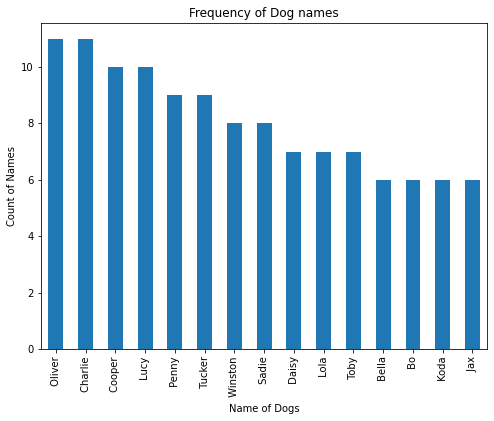

In [97]:
# Plot a bar chart of the common dog names
names.plot(kind='bar', title ='Frequency of Dog names', xlabel= 'Name of Dogs', ylabel='Count of Names', figsize=(8,6));

- This is the plot of the names of Dogs extracted from the test column into the dog_names column.<br>
- This chart shows that people prefare names like Oliver, Charlie, Copperand Lucy for there dogs. 

- The bar chart below shows the result that could have been gotten if the data were not properly cleaned.

In [83]:
#Check the number of real dog names in the dog_names column
master_df['dog_names'].str.istitle().sum() - master_df.query('dog_names == "None"').count()[0]

1384

- There are 1384 real dog names extracted from the text columns

In [98]:
names = master_df['name'].value_counts().head(15)

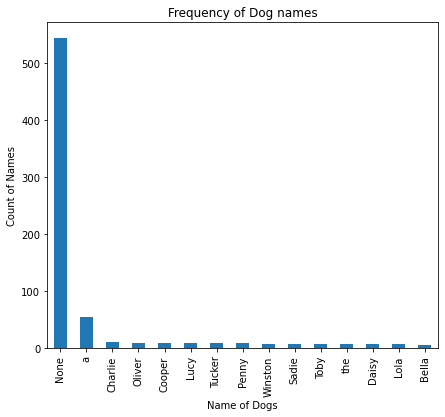

In [99]:
names.plot(kind='bar', title ='Frequency of Dog names', xlabel= 'Name of Dogs', ylabel='Count of Names', figsize=(7,6));

-In the plot above the barchart shows thar most of the dog names were not recorded in the name column. The reason why I did not drop this column 'name' was because I wanted to use it for camparison during visualization

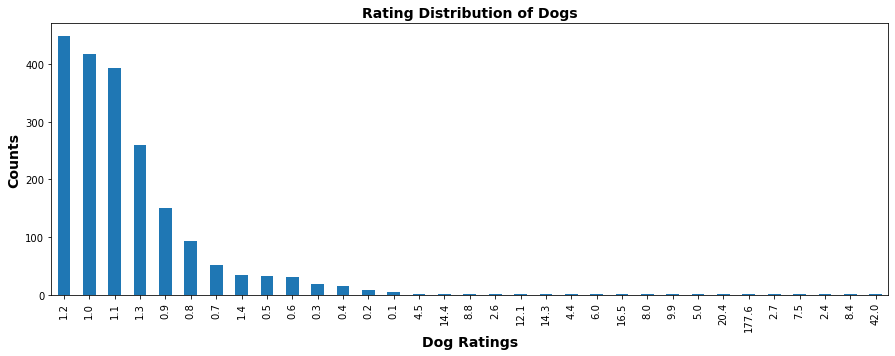

In [446]:
# This barchart will display  distribution of tdog ratings
master_df['new_rating'].value_counts().plot(kind = 'bar', figsize=(15,5));
plt.xlabel("Dog Ratings", fontsize = 14, fontweight = 'bold')
plt.ylabel("Counts", fontsize = 14, fontweight = 'bold');
plt.title('Rating Distribution of Dogs', fontsize = 14, fontweight = 'bold');

- Most people rated there dogs 12/10, followed by 10/10 and 11/10. Although there were ratings as high as 13/10, they are about half the number of people that rated their dogs 12/10.<br>Recall that the numerator were divided by the denomenator to get the new_ratings

In [460]:
#Dog_stage.plot(kind='bar', title ='Frequency of Dog names', xlabel= 'Name of Dogs', ylabel='Count of Names', figsize=(7,6));

In [482]:
# plot a bar chart for the phases.
# we only need the rows with stages
df_stage = master_df[master_df['dog_phases'].isnull()==False]

In [484]:
master_df.dog_phases.value_counts()

                1679
pupper           203
doggo             61
puppo             22
doggopupper        9
floofer            6
doggopuppo         1
doggofloofer       1
Name: dog_phases, dtype: int64

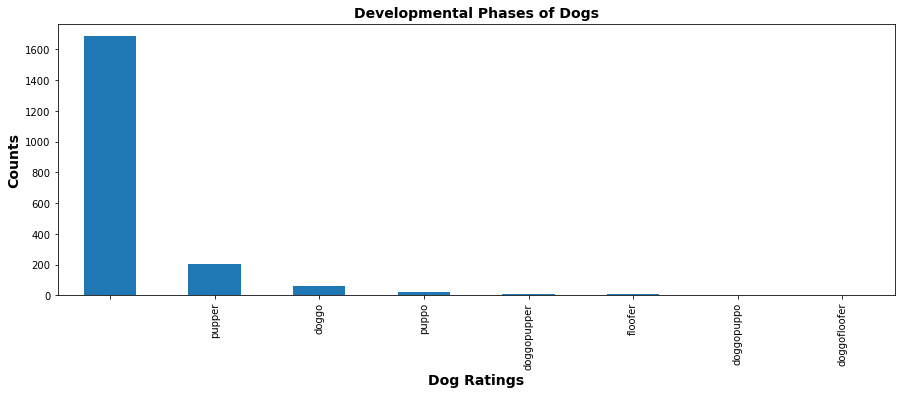

In [100]:
# This barchart will display a very fine age distribution of the patients
master_df['dog_phases'].value_counts().plot(kind = 'bar', figsize=(15,5));
plt.xlabel("Dog Ratings", fontsize = 14, fontweight = 'bold')
plt.ylabel("Counts", fontsize = 14, fontweight = 'bold');
plt.title('Developmental Phases of Dogs', fontsize = 14, fontweight = 'bold');

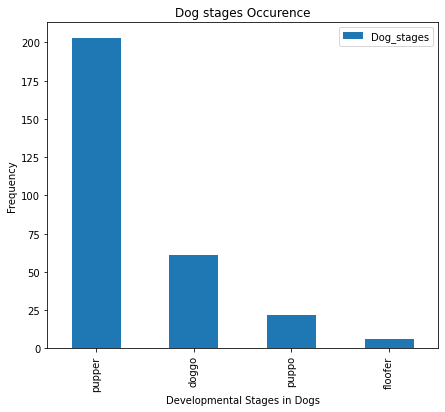

In [2]:
plotdata = pd.DataFrame({"Dog_stages": [203, 61, 22, 6]}, index=["pupper", "doggo", "puppo", "floofer"])
# Plot a bar chart
plotdata.plot(kind="bar", xlabel= 'Developmental Stages in Dogs', ylabel = 'Frequency', 
              title = 'Dog stages Occurence', figsize = (7,6));

- Although many dogs in this dataset were not assigned stages as seen in the first barchart of dog developmental stage.
- From the dictionary of dogs, floof are dogs with seemingly excess fur. In the barchart above, floofers are the least preffered amongst the dog stages. Could the excess fur be the reason?

<a id='Report'></a>
## Reporting

<a id='References'></a>
### REFERENCES
- https://rachelchen0104.medium.com/weratedogs-project-part-ii-data-cleaning-and-data-analysis-b1ea2811d98b
- https://www.sharpdesigns.xyz/pages/wrangle_act.html
- https://github.com/BayanAlArifi/WeRateDogs_Analysis_and_Visualization
- https://towardsdatascience.com/data-analysis-project-weratedogs-16aad3f6c8c2
- https://github.com/chrislicodes/Udacity-Data-Analyst-Nanodegree/blob/master/P3-Analyze-Twitter-Data/wrangle_act.ipynb
- https://github.com/jemc36/Udacity-DAND-DataWrangling-TwitterAPI-WeRateDogs/blob/master/wrangle_act.ipynb
- https://www.matthewunrue.com/Projects/Udacity/WeRateDogs/Project.html
- https://www.kaggle.com/code/rihamrafat/we-rate-dogs-data-wrangling
- https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
- https://www.alx-t.com/courses/data-analyst/
- https://www.kaggle.com/code/msytnadeem/weratedogs-tweet-data-wrangling
